In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("all_GTR_R4_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n73          1.6993 ( 1.5739,  1.9396) ( 1.5551,  1.9024)  0.3473 (Jnode 142)\n',
 't_n74          1.3758 ( 1.2145,  1.5784) ( 1.2025,  1.5603)  0.3578 (Jnode 141)\n',
 't_n75          1.0522 ( 0.9303,  1.1865) ( 0.9218,  1.1744)  0.2526 (Jnode 140)\n',
 't_n76          1.0008 ( 0.8796,  1.1330) ( 0.8701,  1.1193)  0.2493 (Jnode 139)\n',
 't_n77          0.8145 ( 0.7314,  0.9283) ( 0.7201,  0.9094)  0.1893 (Jnode 138)\n',
 't_n78          0.7639 ( 0.6948,  0.8549) ( 0.6884,  0.8440)  0.1556 (Jnode 137)\n',
 't_n79          0.6532 ( 0.6189,  0.6791) ( 0.6209,  0.6808)  0.0599 (Jnode 136)\n',
 't_n80          0.5730 ( 0.5569,  0.5975) ( 0.5550,  0.5950)  0.0400 (Jnode 135)\n',
 't_n81          0.5136 ( 0.4853,  0.5417) ( 0.4852,  0.5416)  0.0563 (Jnode 134)\n',
 't_n82          0.4239 ( 0.4003,  0.4569) ( 0.3984,  0.4544)  0.0560 (Jnode 133)\n',
 't_n83          0.3796 ( 0.3452,  0.4181) ( 0.3435,  0.4162)  0.0727 (Jnode 132)\n',
 't_n84          0.3379 ( 0.2973,  0.3809) ( 0.2942,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143']

In [6]:
posterior_mean_iqtree

[1.6993,
 1.3758,
 1.0522,
 1.0008,
 0.8145,
 0.7639,
 0.6532,
 0.573,
 0.5136,
 0.4239,
 0.3796,
 0.3379,
 0.2705,
 0.1554,
 0.1231,
 0.0515,
 0.0178,
 0.1675,
 0.1338,
 0.1524,
 0.5091,
 0.3302,
 0.0724,
 0.303,
 0.2857,
 0.6454,
 0.5816,
 0.4413,
 0.3947,
 0.3627,
 0.3435,
 0.2819,
 0.144,
 0.2987,
 0.2453,
 0.2216,
 0.1118,
 0.2232,
 0.0853,
 0.2899,
 0.2365,
 0.1577,
 0.0967,
 0.0575,
 0.2266,
 0.1218,
 0.1155,
 0.4637,
 0.2412,
 0.9843,
 0.6836,
 0.6494,
 0.6407,
 0.6219,
 0.5672,
 0.6164,
 0.4269,
 0.6188,
 0.597,
 0.58,
 0.5129,
 0.27,
 0.1229,
 0.5101,
 0.8434,
 0.959,
 0.7898,
 0.6142,
 0.9449,
 0.6901,
 0.4333]

In [7]:
lower_ci_iqtree

[1.5739,
 1.2145,
 0.9303,
 0.8796,
 0.7314,
 0.6948,
 0.6189,
 0.5569,
 0.4853,
 0.4003,
 0.3452,
 0.2973,
 0.2325,
 0.1366,
 0.1051,
 0.0351,
 0.011,
 0.1185,
 0.0891,
 0.1052,
 0.4802,
 0.2101,
 0.0257,
 0.1818,
 0.1564,
 0.6135,
 0.5567,
 0.399,
 0.3649,
 0.3387,
 0.3195,
 0.2403,
 0.0952,
 0.2695,
 0.2086,
 0.1831,
 0.0795,
 0.1844,
 0.0497,
 0.2646,
 0.2105,
 0.1381,
 0.0867,
 0.0471,
 0.1486,
 0.0659,
 0.0573,
 0.3385,
 0.0951,
 0.8603,
 0.6364,
 0.6124,
 0.6051,
 0.5865,
 0.4942,
 0.5794,
 0.2237,
 0.5864,
 0.5676,
 0.5527,
 0.4934,
 0.2322,
 0.0864,
 0.4711,
 0.6682,
 0.7486,
 0.5767,
 0.4253,
 0.7265,
 0.4718,
 0.2506]

In [8]:
upper_ci_iqtree

[1.9396,
 1.5784,
 1.1865,
 1.133,
 0.9283,
 0.8549,
 0.6791,
 0.5975,
 0.5417,
 0.4569,
 0.4181,
 0.3809,
 0.3166,
 0.1673,
 0.1379,
 0.0701,
 0.0268,
 0.2438,
 0.2139,
 0.2298,
 0.5376,
 0.4198,
 0.1428,
 0.4008,
 0.3872,
 0.669,
 0.6397,
 0.507,
 0.4496,
 0.4069,
 0.386,
 0.3239,
 0.204,
 0.3393,
 0.2873,
 0.2644,
 0.1502,
 0.2665,
 0.1266,
 0.33,
 0.2731,
 0.184,
 0.1022,
 0.0672,
 0.2878,
 0.1793,
 0.1707,
 0.5659,
 0.4129,
 1.119,
 0.7418,
 0.6844,
 0.6736,
 0.6537,
 0.615,
 0.6493,
 0.5677,
 0.6497,
 0.6274,
 0.6105,
 0.543,
 0.2889,
 0.1603,
 0.5795,
 1.0264,
 1.1125,
 0.9632,
 0.8233,
 1.1014,
 1.0192,
 0.567]

In [9]:
file_LG = open("all_calibrations_GTR_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

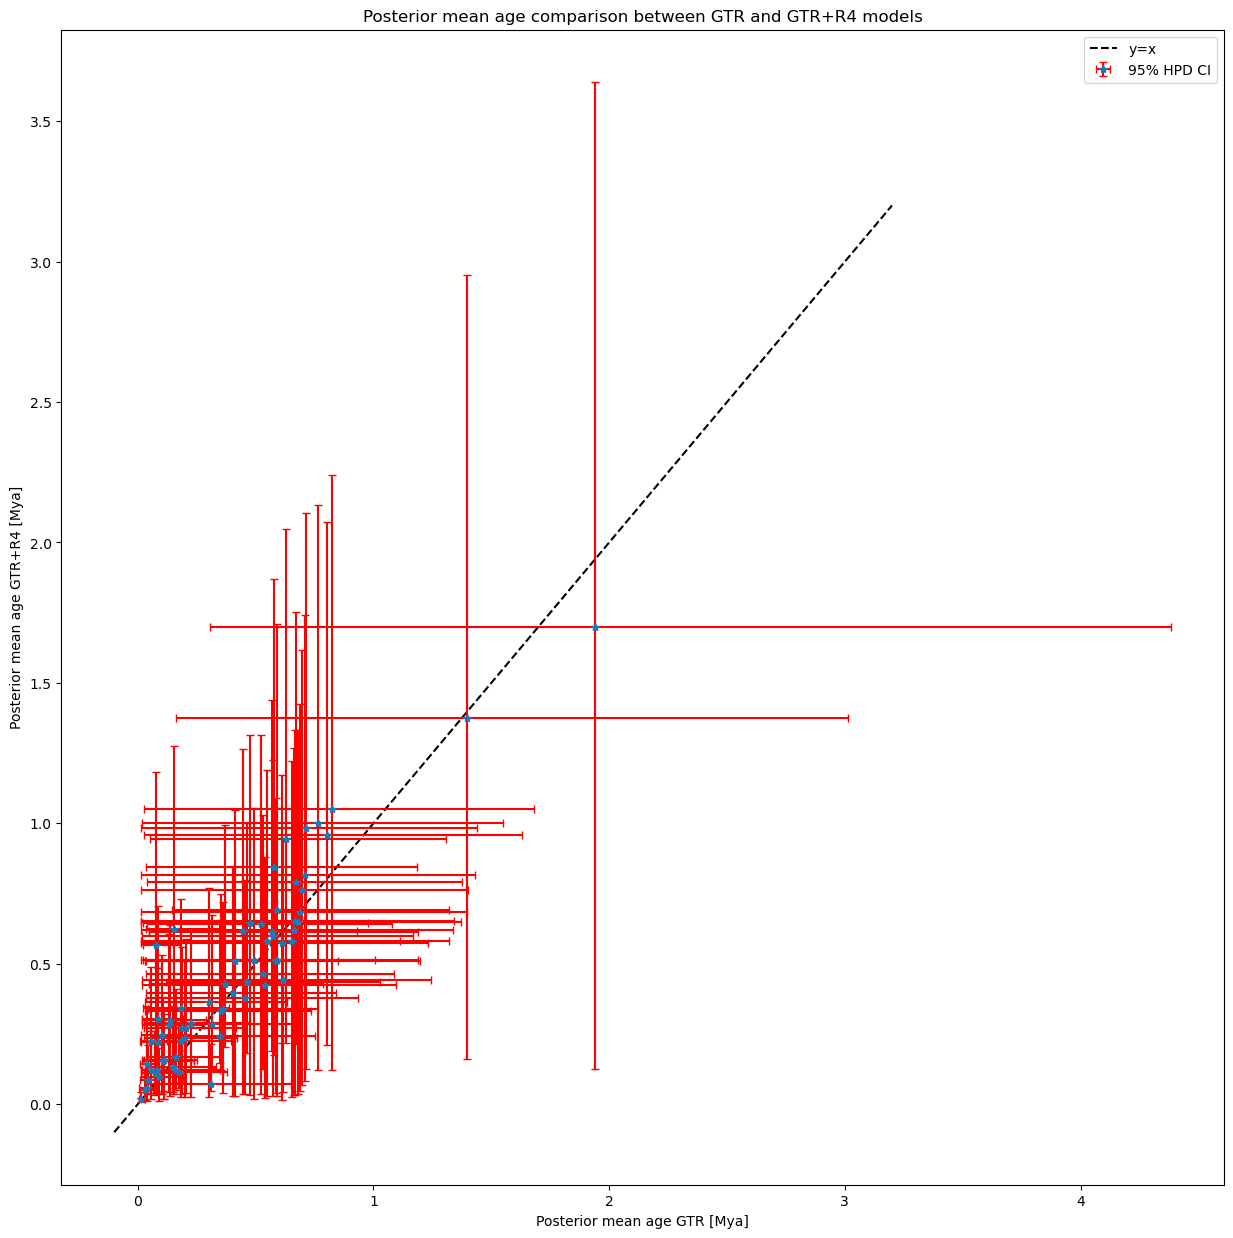

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+R4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+R4 models')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./mammals_posterior_mean_age_comparison_GTR_R4.png')

In [11]:
posterior_mean_baseml

[1.9384,
 1.3964,
 0.8259,
 0.7656,
 0.7094,
 0.6954,
 0.6653,
 0.6112,
 0.59,
 0.5399,
 0.4536,
 0.3632,
 0.2034,
 0.1109,
 0.055,
 0.0284,
 0.0133,
 0.1601,
 0.1476,
 0.1048,
 0.4118,
 0.3535,
 0.3106,
 0.0865,
 0.3164,
 0.4775,
 0.6559,
 0.6145,
 0.4041,
 0.3026,
 0.1815,
 0.1312,
 0.0403,
 0.1355,
 0.1028,
 0.0872,
 0.0729,
 0.0564,
 0.0414,
 0.2257,
 0.1996,
 0.1128,
 0.0918,
 0.0374,
 0.1828,
 0.1596,
 0.174,
 0.5303,
 0.3497,
 0.7121,
 0.6903,
 0.679,
 0.5237,
 0.155,
 0.078,
 0.445,
 0.3711,
 0.6613,
 0.5757,
 0.5473,
 0.4935,
 0.1864,
 0.0809,
 0.5847,
 0.5763,
 0.8018,
 0.672,
 0.5713,
 0.6286,
 0.5914,
 0.462]

In [12]:
posterior_mean_iqtree

[1.6993,
 1.3758,
 1.0522,
 1.0008,
 0.8145,
 0.7639,
 0.6532,
 0.573,
 0.5136,
 0.4239,
 0.3796,
 0.3379,
 0.2705,
 0.1554,
 0.1231,
 0.0515,
 0.0178,
 0.1675,
 0.1338,
 0.1524,
 0.5091,
 0.3302,
 0.0724,
 0.303,
 0.2857,
 0.6454,
 0.5816,
 0.4413,
 0.3947,
 0.3627,
 0.3435,
 0.2819,
 0.144,
 0.2987,
 0.2453,
 0.2216,
 0.1118,
 0.2232,
 0.0853,
 0.2899,
 0.2365,
 0.1577,
 0.0967,
 0.0575,
 0.2266,
 0.1218,
 0.1155,
 0.4637,
 0.2412,
 0.9843,
 0.6836,
 0.6494,
 0.6407,
 0.6219,
 0.5672,
 0.6164,
 0.4269,
 0.6188,
 0.597,
 0.58,
 0.5129,
 0.27,
 0.1229,
 0.5101,
 0.8434,
 0.959,
 0.7898,
 0.6142,
 0.9449,
 0.6901,
 0.4333]

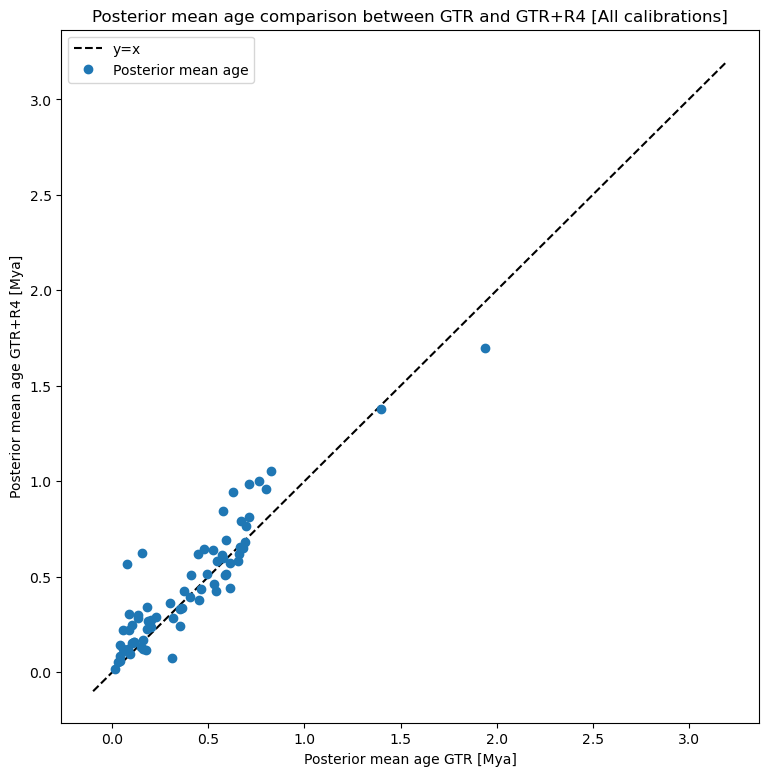

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot([-0.1,3.2],
        [-0.1, 3.2],
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age GTR [Mya]')
ax.set_ylabel('Posterior mean age GTR+R4 [Mya]')
ax.set_title('Posterior mean age comparison between GTR and GTR+R4 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./mammals_posterior_mean_age_comparison_GTR_R4_scatter.png')

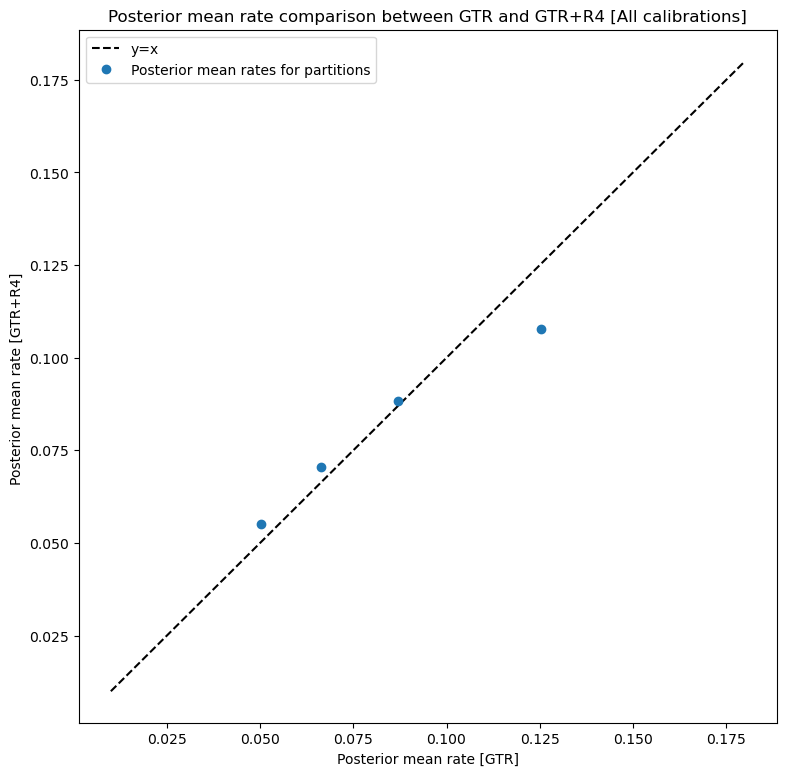

In [14]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([0.01,0.18], 
        [0.01, 0.18], 
        'k--', label='y=x')
ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
 
# Labels and title
ax.set_xlabel('Posterior mean rate [GTR]')
ax.set_ylabel('Posterior mean rate [GTR+R4] ')
ax.set_title('Posterior mean rate comparison between GTR and GTR+R4 [All calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./mammals_posterior_mean_rate_comparison_GTR_R4_all_scatter.png')